# Specificare e Interpretare un Modello Longitudinale {#sec-specification-lgm}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [41]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(kableExtra, lme4, gridExtra)

## Introduzione

Nel presente capitolo esploreremo i modelli panel longitudinali tradizionali, con un’attenzione particolare alla struttura simplex e alle tecniche per ottimizzare, interpretare e arricchire questi modelli con covariate e analisi degli effetti indiretti.

I modelli panel e i modelli SEM longitudinali si concentrano sulle relazioni predittive tra variabili latenti (ad esempio, atteggiamenti o abilità) e sulle loro variazioni nel tempo. Sebbene spesso usati come sinonimi, i modelli panel differiscono dai modelli di Confirmatory Factor Analysis (CFA) longitudinali: mentre i CFA analizzano la stabilità dei livelli medi dei costrutti, i modelli panel esplorano le interazioni dinamiche tra variabili nel corso del tempo. Un’importante distinzione va fatta anche con i modelli di crescita latente (LGM), che hanno l’obiettivo di mappare l’evoluzione temporale dei livelli medi di un costrutto, come il monitoraggio dello sviluppo di una competenza specifica.

Inoltre, le relazioni di regressione nei modelli panel suggeriscono un’interpretazione causale, ma questa deve essere affrontata con cautela. La causalità in questi modelli è implicata quando si osservano effetti predittivi coerenti nel tempo, ma è essenziale che i dati siano raccolti con rigore per permettere inferenze causali. Un elemento fondamentale è il controllo delle variabili confondenti, che permette di ridurre il rischio di bias e di migliorare la robustezza delle inferenze.

## Il Processo di Cambiamento Simplex

Un modello efficace per rappresentare il cambiamento continuo e graduale nel tempo è la struttura simplex. Questa struttura si basa sull’assunto che gli individui cambino a un ritmo stabile, con influenze esterne minime. Nel modello simplex, la correlazione tra punti temporali decresce in modo prevedibile, secondo una progressione graduale. La Tabella 1 illustra una struttura di correlazione simplex in cui la stabilità decresce col passare del tempo.

**Tabella 1. ** Esempi di Strutture di Correlazione Simplex.

|         | T1 | T2 | T3 | T4 | T5 | T6 | T7 | T8 |
|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| T1 |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |   .262  |   .210  |
| T2 |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |   .262  |
| T3 |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |   .328  |
| T4 |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |   .410  |
| T5 |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |   .512  |
| T6 |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |   .640  |
| T7 |   .022  |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |   .800  |
| T8 |   .011  |   .022  |   .041  |   .078  |   .147  |   .279  |   .528  |    --   |

*Nota: Le correlazioni sopra la diagonale sono basate sull'analogia del mescolamento delle carte con una correlazione autoregressiva di .528. Le correlazioni sotto la diagonale si basano su una stabilità iniziale più elevata (.80), indicando una persistenza più forte nel tempo.*

Nel modello simplex, il cambiamento graduale e stabile è rappresentato da un coefficiente di stabilità costante tra punti temporali consecutivi, simile alla correlazione tra l’ordine delle carte in un mazzo dopo diverse mescolate.

L’esempio del mazzo di carte mescolato è una metafora utile per comprendere come funziona una **struttura di correlazione simplex** e il concetto di **autoregressività** nei modelli longitudinali. Immaginiamo di avere un mazzo di carte perfettamente ordinato, in cui ogni carta ha una posizione specifica. Ogni volta che mescoliamo il mazzo, l’ordine cambia, ma non in modo totalmente casuale: la disposizione iniziale ha ancora una certa influenza sull’ordine risultante dopo la mescolata.

### Mescolamento e Correlazione
Se consideriamo l’ordine delle carte prima e dopo una singola mescolata, possiamo calcolare la **correlazione** tra la posizione delle carte iniziale e quella dopo il mescolamento. Una sola mescolata modifica la disposizione delle carte, ma mantiene una certa somiglianza con l’ordine iniziale: diciamo, per esempio, che la correlazione è di **0.528**. Questa correlazione rappresenta la **stabilità del cambiamento**: dopo una singola mescolata, le carte non sono ancora completamente in un ordine casuale.

Ogni successiva mescolata riduce ulteriormente questa correlazione. Dopo una seconda mescolata, la correlazione tra l’ordine originale e il nuovo ordine sarà inferiore, ad esempio **0.279**. Con il terzo mescolamento, la correlazione continua a decrescere, e così via. Dopo circa sette mescolate perfette, l’ordine diventa quasi del tutto casuale, con una correlazione vicino a **0** rispetto all’ordine iniziale.

### Cosa Rappresenta nel Contesto dei Modelli Longitudinali
In un modello longitudinale con struttura simplex, ogni “mescolata” rappresenta un passaggio temporale in cui un fenomeno cambia gradualmente ma in modo prevedibile. La correlazione tra i punti temporali successivi diminuisce man mano che ci si allontana dal punto di partenza, proprio come la correlazione dell’ordine delle carte diminuisce con ogni mescolata. 

- **Correlazione tra punti temporali consecutivi**: rappresenta la stabilità immediata del costrutto. Più è alta la correlazione tra misurazioni consecutive, maggiore è la stabilità del fenomeno nel tempo.
- **Correlazione tra punti temporali distanti**: rappresenta quanto il fenomeno rimanga stabile su periodi più lunghi. Una diminuzione graduale della correlazione, come nell’esempio del mazzo di carte, è tipica di processi che cambiano in modo costante ma senza grandi sconvolgimenti improvvisi.

In conclusione, l’esempio del mazzo di carte ci aiuta a visualizzare come un modello simplex cattura il cambiamento graduale e prevedibile in un processo. Ogni passaggio temporale influenza il successivo, ma con il tempo questa influenza diminuisce, portando a una correlazione minore tra i punti temporali distanti. 

Questa struttura è utile nei modelli panel longitudinali perché descrive una dinamica di cambiamento continua e coerente, tipica di molti fenomeni psicologici e sociali che evolvono in modo graduale e prevedibile nel tempo.

::: {#fig-simplex}
![](../../figures/little_fig_simplex.png){width="90%"}

Stime dei parametri standardizzati dal modello simplex di mazzi di carte mescolati consecutivamente. Nota. Queste stime dei parametri provengono da un modello adattato ai dati nella tabella precedente. Questo modello ha 21 gradi di libertà e un adattamento perfetto del modello. Le correlazioni tra i mazzi separati da più di una mescolata sono riprodotte tracciando i percorsi di regressione tra ciascun mazzo consecutivo. Le linee tratteggiate mostrano le correlazioni riprodotte con l'ordine iniziale del mazzo. [Figura tratta da @little2023longitudinal]
:::

### Modelli Simplex e Modelli Autoregressivi (AR1 e AR2)

In termini formali, possiamo dire che la struttura simplex può essere vista come un’istanza di un modello autoregressivo di primo ordine (AR1), in cui ogni punto temporale è correlato solo con il precedente. Nei modelli AR1, l’effetto di ogni variabile dipende unicamente dalla sua osservazione immediatamente precedente. Per processi che mostrano maggiore persistenza nel tempo, si può invece adottare un modello autoregressivo di secondo ordine (AR2), dove ogni punto è influenzato non solo dal precedente, ma anche dal punto ancora precedente.

Il modello AR2 suggerisce che l’influenza persiste per due passaggi temporali, implicando una stabilità più duratura rispetto al modello AR1. Questo approccio è utile per rappresentare processi in cui l’effetto di un evento non si dissipa immediatamente, ma ha un’influenza estesa nel tempo.

### Applicazioni della Struttura Simplex nella Ricerca Psicologica

In psicologia e scienze sociali, il modello simplex è frequentemente usato per studiare processi di cambiamento in campioni longitudinali. La semplicità di questa struttura la rende una scelta ideale per rappresentare fenomeni evolutivi graduali, come lo sviluppo di competenze o il cambiamento di atteggiamenti. La struttura simplex può anche essere estesa con l’inclusione di variabili contestuali, il che ne aumenta la flessibilità senza compromettere la chiarezza.

Per comprendere la natura di un processo di cambiamento, è essenziale che il modello predittivo catturi correttamente il ritmo del cambiamento stesso. Una frequenza di misurazione adeguata permette di rilevare con precisione la velocità e la consistenza delle variazioni, aumentando la validità delle inferenze che si possono trarre.

In sintesi, i modelli panel longitudinali e la struttura simplex offrono potenti strumenti per analizzare il cambiamento e le relazioni temporali nei dati longitudinali. La struttura simplex, in particolare, è una rappresentazione versatile ed efficace dei processi di cambiamento graduale, utile per studiare fenomeni psicologici ed evolutivi in modo teoricamente informato e statisticamente robusto.

### Modello Simplex per il Mescolamento di Carte

Esaminiamo qui di seguto l'implementazione del modello Simplex proposta da @little2023longitudinal per i dati artificiali relativi all'esempio del mazzo di carte discusso in precedenza.

In [2]:
tri_corr <- c(
    1, rep(0, 7),
    0.523, 1, rep(0, 6),
    0.279, 0.523, 1, rep(0, 5),
    0.147, 0.279, 0.523, 1, rep(0, 4),
    0.078, 0.147, 0.279, 0.523, 1, rep(0, 3),
    0.041, 0.078, 0.147, 0.279, 0.523, 1, rep(0, 2),
    0.022, 0.041, 0.078, 0.147, 0.279, 0.523, 1, 0,
    0.011, 0.022, 0.041, 0.078, 0.147, 0.279, 0.523, 1
)
upper <- matrix(tri_corr, 8, byrow = FALSE)
lower <- matrix(tri_corr, 8, byrow = TRUE)
mycorr <- upper + lower - diag(8)

rownames(mycorr) <- c("Time1", "Time2", "Time3", "Time4", "Time5", "Time6", "Time7", "Time8")
colnames(mycorr) <- c("Time1", "Time2", "Time3", "Time4", "Time5", "Time6", "Time7", "Time8")
mynob <- 166

mycorr |> print()

      Time1 Time2 Time3 Time4 Time5 Time6 Time7 Time8
Time1 1.000 0.523 0.279 0.147 0.078 0.041 0.022 0.011
Time2 0.523 1.000 0.523 0.279 0.147 0.078 0.041 0.022
Time3 0.279 0.523 1.000 0.523 0.279 0.147 0.078 0.041
Time4 0.147 0.279 0.523 1.000 0.523 0.279 0.147 0.078
Time5 0.078 0.147 0.279 0.523 1.000 0.523 0.279 0.147
Time6 0.041 0.078 0.147 0.279 0.523 1.000 0.523 0.279
Time7 0.022 0.041 0.078 0.147 0.279 0.523 1.000 0.523
Time8 0.011 0.022 0.041 0.078 0.147 0.279 0.523 1.000


In [3]:
mod6_2 <- "
    Time2 ~ Time1
    Time3 ~ Time2
    Time4 ~ Time3
    Time5 ~ Time4
    Time6 ~ Time5
    Time7 ~ Time6
    Time8 ~ Time7

    Time1 ~~ 1*Time1
    Time2 ~~ Time2
    Time3 ~~ Time3
    Time4 ~~ Time4
    Time5 ~~ Time5
    Time6 ~~ Time6
    Time7 ~~ Time7
    Time8 ~~ Time8
"

In [4]:
fit6_2 <- lavaan(mod6_2, sample.cov = mycorr, sample.nobs = mynob, fixed.x = FALSE)

In [5]:
parameterEstimates(fit6_2) |> print()

     lhs op   rhs   est    se     z pvalue ci.lower ci.upper
1  Time2  ~ Time1 0.523 0.066 7.930      0    0.394    0.652
2  Time3  ~ Time2 0.523 0.066 7.912      0    0.393    0.653
3  Time4  ~ Time3 0.523 0.066 7.908      0    0.393    0.653
4  Time5  ~ Time4 0.523 0.066 7.906      0    0.393    0.653
5  Time6  ~ Time5 0.523 0.066 7.906      0    0.393    0.653
6  Time7  ~ Time6 0.523 0.066 7.906      0    0.393    0.653
7  Time8  ~ Time7 0.523 0.066 7.906      0    0.393    0.653
8  Time1 ~~ Time1 1.000 0.000    NA     NA    1.000    1.000
9  Time2 ~~ Time2 0.722 0.079 9.110      0    0.567    0.877
10 Time3 ~~ Time3 0.722 0.079 9.110      0    0.567    0.877
11 Time4 ~~ Time4 0.722 0.079 9.110      0    0.567    0.877
12 Time5 ~~ Time5 0.722 0.079 9.110      0    0.567    0.877
13 Time6 ~~ Time6 0.722 0.079 9.110      0    0.567    0.877
14 Time7 ~~ Time7 0.722 0.079 9.110      0    0.567    0.877
15 Time8 ~~ Time8 0.722 0.079 9.110      0    0.567    0.877


Nel commentare il modello Simplex specificato, si può osservare che, per i dati artificiali in questione, la stima della correlazione tra costrutti latenti in momenti successivi risulta costante, con un valore di 0.523. Questo dato è in linea con i risultati ottenuti da @little2023longitudinal, che riporta una correlazione di 0.528. È importante notare la consistenza in queste stime, indicativa di una relazione stabile nel tempo tra i costrutti.

Inoltre, il modello mostra che la varianza delle variabili latenti rimane relativamente costante nel tempo, con un valore di 0.722. Questo suggerisce che, nonostante il passare del tempo e i possibili cambiamenti nei costrutti, la quantità di varianza che essi spiegano rimane simile. Un'eccezione a questo schema si trova nella varianza al Tempo 1, che è stata fissata a 1. Questa scelta metodologica è comune in molti modelli di serie temporali per stabilire un punto di riferimento o una scala di misurazione per le varianze nei tempi successivi.

Rifocalizziamoci sulle correlazioni nella parte inferiore della diagonale della Tabella 1, dove possiamo osservare una **stabilità piuttosto elevata tra punti temporali successivi**, con una correlazione di **0.80** tra ciascun punto temporale e il successivo. Tuttavia, all’aumentare dell’intervallo tra le misurazioni, la correlazione tra punti temporali distanti diminuisce in modo graduale e prevedibile. Ad esempio, nella tabella, la correlazione tra Tempo 1 e Tempo 3 è di **0.64**, lo stesso valore che troviamo tra Tempo 2 e Tempo 4, tra Tempo 5 e Tempo 7, e così via per ogni coppia di punti temporali separati da uno spazio temporale intermedio. Alla massima distanza, la correlazione tra Tempo 1 e Tempo 8 è ancora leggermente positiva, pari a **0.210**; con un numero crescente di punti temporali, questa correlazione si avvicinerebbe gradualmente a zero.

Questo schema di correlazioni evidenzia che, mentre la **stabilità a breve termine** (tra punti temporali adiacenti) è elevata, essa diminuisce all'aumentare della distanza tra le misurazioni. Questo riflette una riduzione dell’influenza o della connessione tra i costrutti latenti misurati a intervalli temporali più lunghi.

Nel triangolo superiore della tabella, la stabilità tra punti temporali adiacenti è più bassa, con una correlazione di **0.528**. Qui, i punti temporali bi-contigui (separati da un intervallo intermedio) si correlano a **0.279** e la correlazione tra i punti più distanti, da Tempo 1 a Tempo 8, scende a **0.011**, praticamente nulla. Entrambi questi schemi riflettono un **tasso costante di cambiamento** e sono ben rappresentati da un **modello autoregressivo simplex**.

Un modello autoregressivo simplex è in grado di riprodurre tutte queste correlazioni attraverso **effetti indiretti**: nel modello, l’influenza del Tempo 1 sul Tempo 8 viene trasmessa indirettamente attraverso una sequenza di influenze dirette da un punto temporale al successivo (es., da Tempo 1 a Tempo 2, da Tempo 2 a Tempo 3, e così via fino a Tempo 8). Questo passaggio continuo di influenze permette di riprodurre lo schema di correlazioni osservato nella Tabella 1. Utilizzando le regole di tracciamento dei percorsi in un modello autoregressivo, possiamo osservare come questo schema di correlazioni diminuisca progressivamente, evidenziando il modo in cui il modello rappresenta il declino della connessione tra i punti temporali man mano che aumenta la distanza tra essi.

In [ ]:
0.523^{2:7} |>
    round(3) |>
    print()

[1] 0.274 0.143 0.075 0.039 0.020 0.011


Il modello presentato nella @little-fig-simplex è un modello Simplex univariato perché include un solo costrutto, rappresentato in più punti temporali. È importante notare che, in un modello come questo, si verifica e si garantisce la forte invarianza fattoriale del modello di misurazione. Inoltre, i residui corrispondenti presentano unicità correlate nel tempo per ogni occorrenza dello stesso indicatore. I coefficienti di percorso in questo modello riproducono perfettamente le correlazioni nella parte superiore della Tabella 1. 

Lo stesso modello, quando applicato all'altro insieme di correlazioni nella Tabella 1, riprodurrebbe altrettanto perfettamente il pattern di correlazione. Gli effetti diretti in ciascun punto temporale adiacente sarebbero di .8, mentre l'effetto indiretto sarebbe il prodotto multiplo dei coefficienti di percorso diretti. Questo approccio mette in evidenza come le correlazioni tra punti temporali più lontani siano il risultato di una serie di influenze dirette che si susseguono nel tempo.

## Basi di un Modello Panel

Consideriamo ora il modello panel. Nella costruzione di un modello panel, le associazioni tra variabili osservate in momenti diversi sono spesso trasformate in percorsi di regressione direzionali. Le covarianze tra variabili al Tempo 1 sono generalmente viste come associazioni "a ordine zero," ovvero associazioni non controllate per altre variabili. Nei momenti successivi, le covarianze tra variabili rappresentano invece varianze residue, o "fattori di disturbo," ossia componenti di varianza non spiegate dagli effetti temporali precedenti.

Un concetto chiave nei modelli panel è il percorso autoregressivo, che rappresenta la relazione predittiva tra lo stesso costrutto in momenti successivi. In aggiunta, i modelli panel possono includere effetti incrociati ritardati (o cross-lagged), dove una variabile predice un’altra variabile in un momento futuro. Entrambi questi tipi di percorso permettono di osservare le dinamiche temporali e la persistenza di influenze tra variabili.

::: {#fig-little-fig7-1}
![](../../figures/little_fig7_1.png){width="80%"}

Etichette dei parametri per tre punti temporali con affetto positivo e affetto negativo: Un'analisi di base del modello panel direzionale. Nota. Si consente l'associazione delle varianze residue tra gli indicatori corrispondenti nel tempo.  [Figura adattata da @little2023longitudinal]
:::

### Modello Panel per Affetto Positivo e Negativo

La figura @little-fig-simplex approfondisce l’uso dei modelli longitudinali tramite un esempio di modello CFA per studiare l'affetto positivo e negativo negli adolescenti. A differenza di un’analisi limitata a soli due punti temporali, questo esempio illustra una configurazione più complessa, in cui i due costrutti (affetto positivo e negativo) vengono misurati in tre momenti distinti. Questa struttura a più punti temporali permette di esaminare come i livelli di affetto positivo e negativo cambiano nel tempo e di osservare le interazioni tra i costrutti lungo diverse fasi della misurazione.

I dati sono i seguenti.

In [38]:
dat <- read.table(
    file = "../../data/grade7and8.long.823.dat",
    col.names = c(
        "PAT1P1", "PAT1P2", "PAT1P3", "NAT1P1", "NAT1P2", "NAT1P3",
        "PAT2P1", "PAT2P2", "PAT2P3", "NAT2P1", "NAT2P2", "NAT2P3",
        "PAT3P1", "PAT3P2", "PAT3P3", "NAT3P1", "NAT3P2", "NAT3P3",
        "grade", "female", "black", "hispanic", "other"
    )
)

In [39]:
psych::describe(dat[, 1:18])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PAT1P1,1,823,2.991885,0.7644692,3.00000,3.042751,0.7413000,1,4,3,-0.4591316,-0.3486015,0.02664772
PAT1P2,2,823,2.895543,0.7471531,3.00000,2.919860,0.7413000,1,4,3,-0.2986814,-0.3732379,0.02604412
PAT1P3,3,823,3.112289,0.7481646,3.00000,3.175932,0.7413000,1,4,3,-0.5761073,-0.2344880,0.02607938
NAT1P1,4,823,1.706311,0.7057569,1.50000,1.596773,0.7413000,1,4,3,1.2112142,1.2584152,0.02460114
NAT1P2,5,823,1.450148,0.6576346,1.00000,1.312657,0.0000000,1,4,3,1.7700996,3.1319596,0.02292370
NAT1P3,6,823,1.453063,0.6678318,1.00000,1.311948,0.0000000,1,4,3,1.8185647,3.3558790,0.02327915
PAT2P1,7,823,3.001628,0.7599034,3.00000,3.044683,0.7413000,1,4,3,-0.4055187,-0.5083138,0.02648857
PAT2P2,8,823,2.909043,0.7491414,3.00000,2.936239,0.7413000,1,4,3,-0.2667719,-0.5077469,0.02611343
PAT2P3,9,823,3.126799,0.7295410,3.09211,3.189561,0.8778623,1,4,3,-0.6282730,-0.1499079,0.02543020


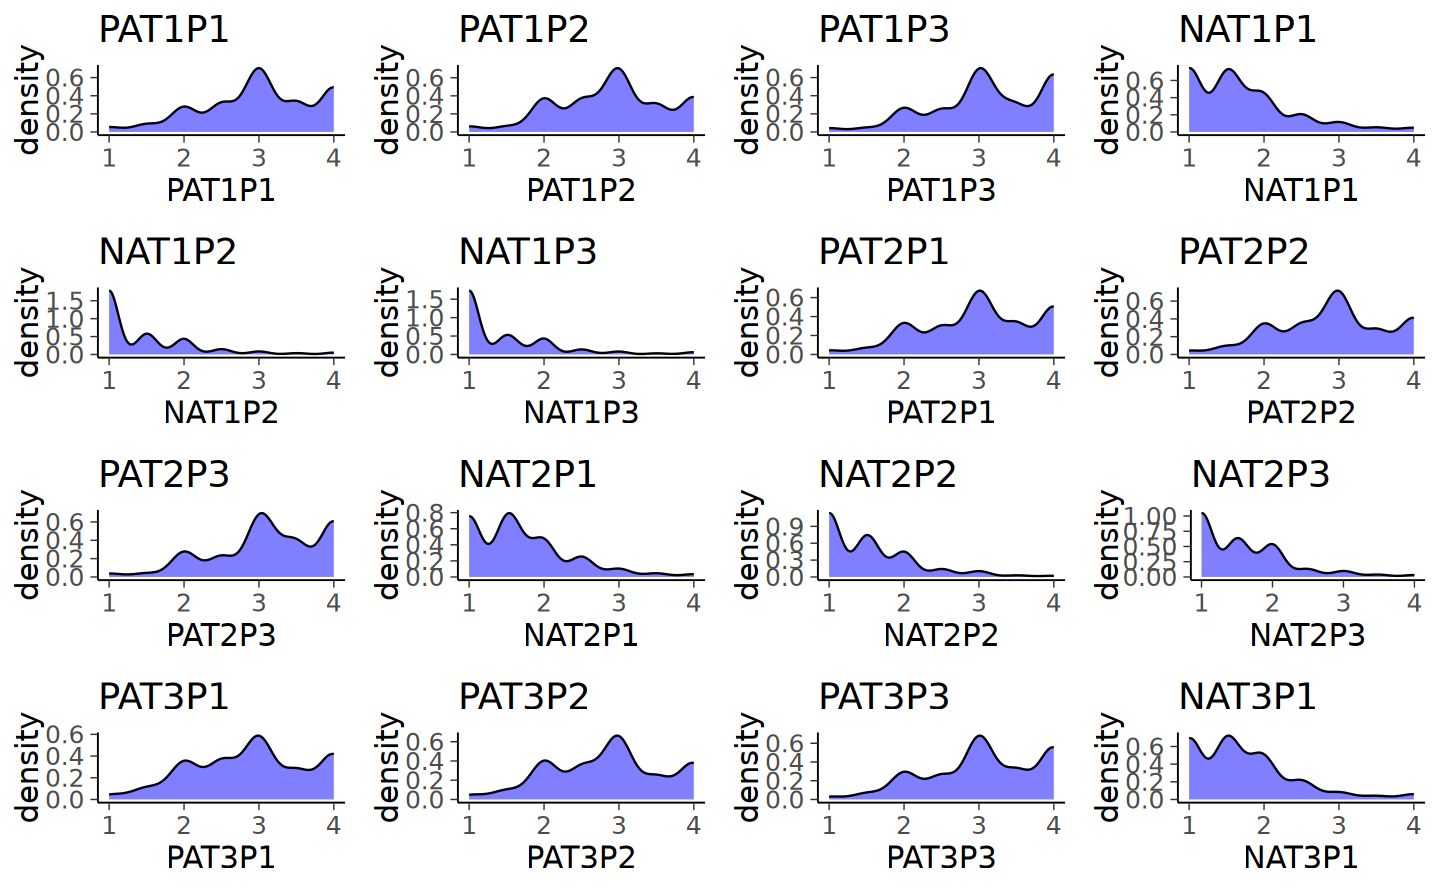

In [42]:
plots_list <- list()

# Creazione della lista di grafici con i pannelli più grandi
plots_list <- list()

for (i in 1:16) {
    col_name <- names(dat)[i]
    p <- ggplot(dat, aes(x = !!sym(col_name))) +
        geom_density(fill = "blue", color = "black", alpha = 0.5) +
        ggtitle(col_name)
    plots_list[[i]] <- p
}

# Organizza e visualizza i grafici con pannelli più grandi
do.call(grid.arrange, c(plots_list, ncol = 4)) 

Iniziamo a specificare il modello nullo.

In [13]:
mod_null <- "
    PAT1P1 ~~ V1*PAT1P1
    PAT1P2 ~~ V2*PAT1P2
    PAT1P3 ~~ V3*PAT1P3
    NAT1P1 ~~ V4*NAT1P1
    NAT1P2 ~~ V5*NAT1P2
    NAT1P3 ~~ V6*NAT1P3

    PAT2P1 ~~ V1*PAT2P1
    PAT2P2 ~~ V2*PAT2P2
    PAT2P3 ~~ V3*PAT2P3
    NAT2P1 ~~ V4*NAT2P1
    NAT2P2 ~~ V5*NAT2P2
    NAT2P3 ~~ V6*NAT2P3

    PAT3P1 ~~ V1*PAT3P1
    PAT3P2 ~~ V2*PAT3P2
    PAT3P3 ~~ V3*PAT3P3
    NAT3P1 ~~ V4*NAT3P1
    NAT3P2 ~~ V5*NAT3P2
    NAT3P3 ~~ V6*NAT3P3

	PAT1P1 ~ T1*1
    PAT1P2 ~ T2*1
    PAT1P3 ~ T3*1
    NAT1P1 ~ T4*1
    NAT1P2 ~ T5*1
    NAT1P3 ~ T6*1

    PAT2P1 ~ T1*1
    PAT2P2 ~ T2*1
    PAT2P3 ~ T3*1
    NAT2P1 ~ T4*1
    NAT2P2 ~ T5*1
    NAT2P3 ~ T6*1

    PAT3P1 ~ T1*1
    PAT3P2 ~ T2*1
    PAT3P3 ~ T3*1
    NAT3P1 ~ T4*1
    NAT3P2 ~ T5*1
    NAT3P3 ~ T6*1
"

Il modello nullo (*baseline*) è usato da @little2023longitudinal come punto di partenza nell'analisi SEM e per i confronti con modelli più complessi. Il modello nullo specifica sei variabili osservate (PAT1P1, PAT1P2, PAT1P3, NAT1P1, NAT1P2, NAT1P3) misurate in tre punti temporali distinti. Questo implica che ci sono 18 variabili osservate in totale. Ogni variabile osservata ha la propria varianza unica che è stimata nel modello. Le medie delle 6 variabili misurate in ciascuno dei tre punti temporali sono assunte non variare in funzione del tempo. Nonostante il modello prenda in considerazione misurazioni ripetute nel tempo, non vi è alcuna specificazione di correlazioni o percorsi causali tra queste misure nel tempo, come sarebbe tipico per i modelli longitudinali. Essendo un modello nullo, non vengono specificate relazioni tra le variabili (varianze e medie) diverse dai loro effetti unici. 

In [14]:
fit_null <- lavaan(mod_null, data = dat, orthogonal = TRUE)

In [15]:
summary(fit_null, standardized = T, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        36
  Number of equality constraints                    24

  Number of observations                           823

Model Test User Model:
                                                       
  Test statistic                              11213.103
  Degrees of freedom                                177
  P-value (Chi-square)                            0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.000
  Tucker-Lewis Index (TLI)                       0.131

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             

### Modello SEM Iniziale

Nel modello SEM iniziale, @little2023longitudinal definisce sei variabili latenti (`Pos1`, `Pos2`, `Pos3`, `Neg1`, `Neg2`, `Neg3`) che rappresentano costrutti psicologici positivi e negativi misurati in tre diversi momenti temporali. Ogni variabile latente è identificato da tre indicatori (per esempio, `Pos1` è identificato da `PAT1P1`, `PAT1P2`, `PAT1P3`), con saturazioni fattoriali L1, L2, L3 che quantificano la relazione tra la variabile latenti e i suoi indicatori. Il modello stima la varianza di ciascuna variabile latente e la covarianza tra variabili latenti diverse. Le medie delle variabili latenti sono impostate a 1, indicando che sono considerate fisse. Il modello include stime per la varianza e la covarianza degli indicatori attraverso il tempo, suggerendo l'esistenza di correlazioni temporali tra gli stessi indicatori misurati in momenti diversi. Ci sono percorsi di regressione che collegano le variabili latenti nel tempo (ad esempio, `Pos2` è influenzata da `Pos1`). Il modello impone alcuni vincoli sulle saturazioni fattoriali e sulle intercette degli indicatori.

Questo modello mira a esplorare le relazioni dinamiche e temporali tra variabili latenti, diversamente da un modello di invarianza configurale, che è più orientato alla valutazione della costanza della struttura fattoriale.

In [16]:
SEMmod <- "
    Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
    Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
    Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
    Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
    Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
    Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3

    ## Latent factor variance and covariance (Psi matrix)
    Pos1 ~~ Pos1 ##Psi 1,1
    Pos1 ~~ Neg1 ##Psi 1,2
    Neg1 ~~ Neg1 ##Psi 2,2

    Pos2 ~~ Pos2 ##Psi 3,3
    Pos2 ~~ Neg2 ##Psi 3,4
    Neg2 ~~ Neg2 ##Psi 4,4

    Pos3 ~~ Pos3  ##Psi 5,5
    Pos3 ~~ Neg3  ##Psi 5,6
    Neg3 ~~ Neg3  ##Psi 6,6

    ## Latent means (Alpha matrix)
    Pos1 ~ 1
    Neg1 ~ 1
    Pos2 ~ 1
    Neg2 ~ 1
    Pos3 ~ 1
    Neg3 ~ 1

    ## indicator resduals var-covar (Theta-Epsilon matrix)
    ## Time1
    PAT1P1 ~~ PAT1P1
    PAT1P1 ~~ PAT2P1
    PAT1P1 ~~ PAT3P1

    PAT1P2 ~~ PAT1P2
    PAT1P2 ~~ PAT2P2
    PAT1P2 ~~ PAT3P2

    PAT1P3 ~~ PAT1P3
    PAT1P3 ~~ PAT2P3
    PAT1P3 ~~ PAT3P3

    NAT1P1 ~~ NAT1P1
    NAT1P1 ~~ NAT2P1
    NAT1P1 ~~ NAT3P1

    NAT1P2 ~~ NAT1P2
    NAT1P2 ~~ NAT2P2
    NAT1P2 ~~ NAT3P2

    NAT1P3 ~~ NAT1P3
    NAT1P3 ~~ NAT2P3
    NAT1P3 ~~ NAT3P3

    #Time2
    PAT2P1 ~~ PAT2P1
    PAT2P1 ~~ PAT3P1

    PAT2P2 ~~ PAT2P2
    PAT2P2 ~~ PAT3P2

    PAT2P3 ~~ PAT2P3
    PAT2P3 ~~ PAT3P3

    NAT2P1 ~~ NAT2P1
    NAT2P1 ~~ NAT3P1

    NAT2P2 ~~ NAT2P2
    NAT2P2 ~~ NAT3P2

    NAT2P3 ~~ NAT2P3
    NAT2P3 ~~ NAT3P3

    ## Time3
    PAT3P1  ~~ PAT3P1
    PAT3P2 ~~ PAT3P2
    PAT3P3 ~~ PAT3P3
    NAT3P1 ~~ NAT3P1
    NAT3P2 ~~ NAT3P2
    NAT3P3 ~~ NAT3P3

    ##Indicator means/intercepts (Tau vector)
    PAT1P1 ~ t1*1
    PAT1P2 ~ t2*1
    PAT1P3 ~ t3*1
    NAT1P1 ~ t4*1
    NAT1P2 ~ t5*1
    NAT1P3 ~ t6*1

    PAT2P1 ~ t1*1
    PAT2P2 ~ t2*1
    PAT2P3 ~ t3*1
    NAT2P1 ~ t4*1
    NAT2P2 ~ t5*1
    NAT2P3 ~ t6*1

    PAT3P1 ~ t1*1
    PAT3P2 ~ t2*1
    PAT3P3 ~ t3*1
    NAT3P1 ~ t4*1
    NAT3P2 ~ t5*1
    NAT3P3 ~ t6*1

    ##Regression paths here
    Pos2 ~ Pos1
    Pos3 ~ Pos1 + Pos2
    Neg2 ~ Neg1
    Neg3 ~ Neg1 + Neg2

    ## Constraints
    L1 == 3 - L2 - L3
    L4 == 3 - L5 - L6
    t1 == 0 - t2 - t3
    t4 == 0 - t5 - t6
"

In [18]:
fitSEM <- lavaan(SEMmod, data = dat, meanstructure = TRUE)

In [43]:
summary(fitSEM, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 129 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        93
  Number of equality constraints                    28

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               441.520
  Degrees of freedom                               124
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.971
  Tucker-Lewis Index (TLI)                       0.964

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

## Invarianza

L'invarianza nei modelli SEM panel è fondamentale per garantire che le misurazioni di un costrutto siano comparabili nel tempo. Nei modelli longitudinali, l'invarianza implica che il significato e la struttura di un costrutto rimangano stabili attraverso diverse occasioni di misurazione. Senza l'invarianza, qualsiasi cambiamento osservato potrebbe riflettere variazioni nella misurazione stessa, piuttosto che un cambiamento reale nel costrutto. Testare l'invarianza nei modelli SEM panel consente quindi di distinguere tra cambiamenti reali e artefatti della misurazione, supportando un'interpretazione valida delle traiettorie di sviluppo.

### Modello di Invarianza Configurale

In un modello di invarianza configurale, ci si aspetta che la struttura fattoriale, cioè il numero di fattori e il pattern di carichi fattoriali, sia la stessa in tutti i gruppi o momenti temporali considerati. 

Ogni variabile latente (`Pos1`, `Pos2`, `Pos3`, `Neg1`, `Neg2`, `Neg3`) è misurata da un set specifico di indicatori in ciascuno dei tre momenti temporali. Ad esempio, `Pos1` è misurata da `PAT1P1`, `PAT1P2`, e `PAT1P3`. I carichi fattoriali (L1, L2, L3, ecc.) sono specificati separatamente per ogni momento temporale. I vincoli imposti (ad esempio, L1 == 3 - L2 - L3) indicano che ci sono alcune restrizioni nella relazione tra i carichi fattoriali. Questi vincoli sono utilizzati per testare l'uguaglianza dei carichi attraverso i diversi tempi. 

Il modello stima separatamente la varianza di ciascun indicatore e di ciascuna variabile latente in ogni momento temporale. Il modello include covarianze sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti, suggerendo che esiste una correlazione tra le misurazioni nel tempo.  Le medie delle variabili latenti e degli indicatori sono specificate imponendo alcuni vincoli (ad esempio, t1 == 0 - t2 - t3).

I vincoli imposti sui carichi fattoriali e sulle medie degli indicatori permettono di testare se la struttura fattoriale è consistente nel tempo, che è l'essenza dell'invarianza configurale. 

In [20]:
mod_config <- "
    Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
    Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
    Pos2 =~ L7*PAT2P1 + L8*PAT2P2 + L9*PAT2P3
    Neg2 =~ L10*NAT2P1 + L11*NAT2P2 + L12*NAT2P3
    Pos3 =~ L13*PAT3P1 + L14*PAT3P2 + L15*PAT3P3
    Neg3 =~ L16*NAT3P1 + L17*NAT3P2 + L18*NAT3P3
    L1 == 3 - L2 - L3
    L4 == 3 - L5 - L6
    L7 == 3 - L8 - L9
    L10== 3 - L11- L12
    L13== 3 - L14- L15
    L16== 3 - L17- L18

    PAT1P1~~PAT1P1
    PAT1P2~~PAT1P2
    PAT1P3~~PAT1P3
    NAT1P1~~NAT1P1
    NAT1P2~~NAT1P2
    NAT1P3~~NAT1P3
    PAT2P1~~PAT2P1
    PAT2P2~~PAT2P2
    PAT2P3~~PAT2P3
    NAT2P1~~NAT2P1
    NAT2P2~~NAT2P2
    NAT2P3~~NAT2P3
    PAT3P1~~PAT3P1
    PAT3P2~~PAT3P2
    PAT3P3~~PAT3P3
    NAT3P1~~NAT3P1
    NAT3P2~~NAT3P2
    NAT3P3~~NAT3P3

    Pos1~~Pos1
    Neg1~~Neg1
    Pos2~~Pos2
    Neg2~~Neg2
    Pos3~~Pos3
    Neg3~~Neg3

    PAT1P1~~PAT2P1 + PAT3P1
    PAT2P1~~PAT3P1
    PAT1P2~~PAT2P2 + PAT3P2
    PAT2P2~~PAT3P2
    PAT1P3~~PAT2P3 + PAT3P3
    PAT2P3~~PAT3P3
    NAT1P1~~NAT2P1 + NAT3P1
    NAT2P1~~NAT3P1
    NAT1P2~~NAT2P2 + NAT3P2
    NAT2P2~~NAT3P2
    NAT1P3~~NAT2P3 + NAT3P3
    NAT2P3~~NAT3P3

    Pos1~~Pos2 + Pos3 + Neg1 + Neg2 + Neg3
    Pos2~~Pos3 + Neg1 + Neg2 + Neg3
    Pos3~~Neg1 + Neg2 + Neg3
    Neg1~~Neg2 + Neg3
    Neg2~~Neg3

    Pos1~NA*1
    Neg1~NA*1
    Pos2~NA*1
    Neg2~NA*1
    Pos3~NA*1
    Neg3~NA*1

    PAT1P1~t1*1
    PAT1P2~t2*1
    PAT1P3~t3*1
    NAT1P1~t4*1
    NAT1P2~t5*1
    NAT1P3~t6*1
    PAT2P1~t7*1
    PAT2P2~t8*1
    PAT2P3~t9*1
    NAT2P1~t10*1
    NAT2P2~t11*1
    NAT2P3~t12*1
    PAT3P1~t13*1
    PAT3P2~t14*1
    PAT3P3~t15*1
    NAT3P1~t16*1
    NAT3P2~t17*1
    NAT3P3~t18*1

    t1 == 0 - t2 - t3
    t4 == 0 - t5 - t6
    t7 == 0 - t8 - t9
    t10== 0 - t11- t12
    t13== 0 - t14- t15
    t16== 0 - t17- t18
"

In [21]:
fit_config <- lavaan(mod_config, data = dat, meanstructure = TRUE)

In [22]:
summary(fit_config, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 160 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    12

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               352.232
  Degrees of freedom                               102
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.966

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

### Modello di Invarianza Debole

Il modello di invarianza debole, o invarianza metrica, è un passo oltre l'invarianza configurale nella SEM per testare l'uguaglianza di costrutti psicologici nel tempo. Mentre l'invarianza configurale si concentra sulla struttura fattoriale (cioè, la presenza e il pattern dei carichi fattoriali), l'invarianza debole agginge il vincolo dell'uguaglianza dei carichi fattoriali nei diversi momenti temporali.

Nel modello successivo, i carichi fattoriali per gli indicatori corrispondenti sono mantenuti costanti nelle tre rilevazioni temporali. Ad esempio, lo stesso valore per `L1` è utilizzato per `PAT1P1`, `PAT2P1` e `PAT3P1` in tutti e tre i momenti temporali. Questo significa che questo modello verifica se la relazione tra le variabili latenti (`Pos` e `Neg`) e i loro indicatori (`PAT` e `NAT`) è la stessa nel tempo.

Il modello stima separatamente la varianza di ciascun indicatore e di ciascuna variabile latente in ogni momento temporale. Questo è simile all'invarianza configurale.

Il modello include covarianze sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti, permettendo di catturare la correlazione tra le misurazioni nel tempo.

Viene fatta un'ipotesi sulle medie degli indicatori, come mostrato nelle equazioni `PAT1P1 ~ t1*1`, ecc. I vincoli sulle medie degli indicatori (ad esempio, `t1 == 0 - t2 - t3`) suggeriscono che ci sono alcune restrizioni matematiche imposte sulle medie degli indicatori.  Prendendo l'equazione `t1 == 0 - t2 - t3` come esempio, questa impone una relazione diretta tra tre medie degli indicatori. In pratica, afferma che la media di un indicatore (rappresentata da `t1`) è definita come l'opposto della somma delle medie di altri due indicatori (`t2` e `t3`). Questo tipo di vincolo può essere interpretato come un meccanismo di bilanciamento. Se `t2` e `t3` aumentano, allora `t1` diminuisce di conseguenza, mantenendo una relazione bilanciata tra queste tre medie.

Mentre l'invarianza configurale richiede solo che la stessa struttura fattoriale sia presente attraverso i gruppi o nel tempo (ad esempio, gli stessi fattori con gli stessi indicatori), l'invarianza debole richiede anche che i carichi fattoriali siano gli stessi. Questo è un test più rigoroso dell'invarianza poiché non solo assume che le stesse variabili latenti siano misurate, ma anche che la forza della relazione tra le variabili latenti e i loro indicatori sia costante.

In [23]:
mod_weak <- "
	Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
	Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
	Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
	Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
	Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
	Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3

	## indicator residual variances (Theta-Epsilon matrix)
	PAT1P1 ~~ PAT1P1
	PAT1P2 ~~ PAT1P2
	PAT1P3 ~~ PAT1P3
	NAT1P1 ~~ NAT1P1
	NAT1P2 ~~ NAT1P2
	NAT1P3 ~~ NAT1P3
	PAT2P1 ~~ PAT2P1
	PAT2P2 ~~ PAT2P2
	PAT2P3 ~~ PAT2P3
	NAT2P1 ~~ NAT2P1
	NAT2P2 ~~ NAT2P2
	NAT2P3 ~~ NAT2P3
	PAT3P1 ~~ PAT3P1
	PAT3P2 ~~ PAT3P2
	PAT3P3 ~~ PAT3P3
	NAT3P1 ~~ NAT3P1
	NAT3P2 ~~ NAT3P2
	NAT3P3 ~~ NAT3P3

	### cross-time correlated residuals
	## correlate residuals of indicators with themselves across time
	PAT1P1 ~~ PAT2P1 + PAT3P1
	PAT2P1 ~~ PAT3P1
	PAT1P2 ~~ PAT2P2 + PAT3P2
	PAT2P2 ~~ PAT3P2
	PAT1P3 ~~ PAT2P3 + PAT3P3
	PAT2P3 ~~ PAT3P3
	NAT1P1 ~~ NAT2P1 + NAT3P1
	NAT2P1 ~~ NAT3P1
	NAT1P2 ~~ NAT2P2 + NAT3P2
	NAT2P2 ~~ NAT3P2
	NAT1P3 ~~ NAT2P3 + NAT3P3
	NAT2P3 ~~ NAT3P3

	## indicator intercepts (Tau vector), include labels for model constraints
	PAT1P1 ~ t1*1
	PAT1P2 ~ t2*1
	PAT1P3 ~ t3*1
	NAT1P1 ~ t4*1
	NAT1P2 ~ t5*1
	NAT1P3 ~ t6*1

	PAT2P1 ~ t7*1
	PAT2P2 ~ t8*1
	PAT2P3 ~ t9*1
	NAT2P1 ~ t10*1
	NAT2P2 ~ t11*1
	NAT2P3 ~ t12*1

	PAT3P1 ~ t13*1
	PAT3P2 ~ t14*1
	PAT3P3 ~ t15*1
	NAT3P1 ~ t16*1
	NAT3P2 ~ t17*1
	NAT3P3 ~ t18*1

	### latent factor variance (Psi matrix)
	Pos1 ~~ Pos1
	Neg1 ~~ Neg1
	Pos2 ~~ Pos2
	Neg2 ~~ Neg2
	Pos3 ~~ Pos3
	Neg3 ~~ Neg3

	### factor covariance
	Pos1 ~~ Pos2 + Pos3 + Neg1 + Neg2 + Neg3
	Pos2 ~~ Pos3 + Neg1 + Neg2 + Neg3
	Pos3 ~~ Neg1 + Neg2 + Neg3
	Neg1 ~~ Neg2 + Neg3
	Neg2 ~~ Neg3

	## latent means (Alpha matrix)
	Pos1 ~ 1
	Neg1 ~ 1
	Pos2 ~ 1
	Neg2 ~ 1
	Pos3 ~ 1
	Neg3 ~ 1

	## model constraints
	L1 == 3 - L2 - L3
	L4 == 3 - L5 - L6
	t1 == 0 - t2 - t3
	t4 == 0 - t5 - t6
	t7 == 0 - t8 - t9
	t10 == 0 - t11 - t12
	t13 == 0 - t14 - t15
	t16 == 0 - t17 - t18
"

In [24]:
fit_wk <- lavaan(mod_weak, data = dat, meanstructure = TRUE)
#### Did not converge on first run, used final estimates on starting values for next run
fit_weak <- lavaan(mod_weak, data = dat, meanstructure = TRUE, start = fit_wk)

In [25]:
summary(fit_weak, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 4 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    20

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               366.562
  Degrees of freedom                               110
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.967

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -1055

### Modello di Invarianza Forte

Il modello di invarianza forte è un passaggio ulteriore nell'analisi dell'invarianza in un contesto di modellazione SEM longitudinale. Mentre l'invarianza configurale si concentra sulla struttura fattoriale e l'invarianza debole aggiunge l'uguaglianza dei carichi fattoriali, l'invarianza forte va oltre per includere anche l'uguaglianza delle medie degli indicatori.

Come nei modelli di invarianza debole, i carichi fattoriali (L1, L2, L3, L4, L5, L6) sono mantenuti uguali attraverso i diversi momenti temporali, indicando che la forza della relazione tra le variabili latenti e i loro indicatori è costante.

Il modello impone che le medie degli indicatori siano uguali attraverso i diversi momenti temporali. Questo è indicato dalle equazioni come `PAT1P1 ~ t1*1`, `PAT2P1 ~ t1*1`, e `PAT3P1 ~ t1*1`, dove `t1` è lo stesso in tutti e tre i momenti temporali. 

Il modello continua a stimare separatamente la varianza degli indicatori e la covarianza sia tra gli indicatori in diversi momenti temporali sia tra le variabili latenti.

Sono imposti alcuni vincoli, come `t1 == 0 - t2 - t3`, che servono a identificare il modello e riflettono ipotesi teoriche sulle relazioni tra gli indicatori.

L'invarianza forte è fondamentale per garantire che le misure di un costrutto siano completamente comparabili nel tempo o tra i gruppi. Se un modello dimostra invarianza forte, significa che non solo la relazione tra le variabili latenti e i loro indicatori è costante, ma anche che il livello di base di ciascun indicatore è lo stesso. Questo è cruciale per confronti delle medie latenti o per esaminare i cambiamenti nel tempo.

In [26]:
mod_strong <- "
	### loadings
	Pos1 =~ L1*PAT1P1 + L2*PAT1P2 + L3*PAT1P3
	Neg1 =~ L4*NAT1P1 + L5*NAT1P2 + L6*NAT1P3
	Pos2 =~ L1*PAT2P1 + L2*PAT2P2 + L3*PAT2P3
	Neg2 =~ L4*NAT2P1 + L5*NAT2P2 + L6*NAT2P3
	Pos3 =~ L1*PAT3P1 + L2*PAT3P2 + L3*PAT3P3
	Neg3 =~ L4*NAT3P1 + L5*NAT3P2 + L6*NAT3P3
	L1 == 3 - L2 - L3
	L4 == 3 - L5 - L6

	### factor variance
	Pos1 ~~ Pos1
	Neg1 ~~ Neg1
	Pos2 ~~ Pos2
	Neg2 ~~ Neg2
	Pos3 ~~ Pos3
	Neg3 ~~ Neg3

	### factor covariance
	Pos1 ~~ Pos2 + Pos3 + Neg1 + Neg2 + Neg3
	Pos2 ~~ Pos3 + Neg1 + Neg2 + Neg3
	Pos3 ~~ Neg1 + Neg2 + Neg3
	Neg1 ~~ Neg2 + Neg3
	Neg2 ~~ Neg3

	### residual variance
	PAT1P1 ~~ PAT1P1
	PAT1P2 ~~ PAT1P2
	PAT1P3 ~~ PAT1P3
	NAT1P1 ~~ NAT1P1
	NAT1P2 ~~ NAT1P2
	NAT1P3 ~~ NAT1P3
	PAT2P1 ~~ PAT2P1
	PAT2P2 ~~ PAT2P2
	PAT2P3 ~~ PAT2P3
	NAT2P1 ~~ NAT2P1
	NAT2P2 ~~ NAT2P2
	NAT2P3 ~~ NAT2P3
	PAT3P1 ~~ PAT3P1
	PAT3P2 ~~ PAT3P2
	PAT3P3 ~~ PAT3P3
	NAT3P1 ~~ NAT3P1
	NAT3P2 ~~ NAT3P2
	NAT3P3 ~~ NAT3P3

	### cross-time correlated residuals
	PAT1P1 ~~ PAT2P1 + PAT3P1
	PAT2P1 ~~ PAT3P1
	PAT1P2 ~~ PAT2P2 + PAT3P2
	PAT2P2 ~~ PAT3P2
	PAT1P3 ~~ PAT2P3 + PAT3P3
	PAT2P3 ~~ PAT3P3
	NAT1P1 ~~ NAT2P1 + NAT3P1
	NAT2P1 ~~ NAT3P1
	NAT1P2 ~~ NAT2P2 + NAT3P2
	NAT2P2 ~~ NAT3P2
	NAT1P3 ~~ NAT2P3 + NAT3P3
	NAT2P3 ~~ NAT3P3

	## latent mean
	Pos1 ~ 1
	Neg1 ~ 1
	Pos2 ~ 1
	Neg2 ~ 1
	Pos3 ~ 1
	Neg3 ~ 1

	## intercept
	PAT1P1 ~ t1*1
	PAT1P2 ~ t2*1
	PAT1P3 ~ t3*1
	NAT1P1 ~ t4*1
	NAT1P2 ~ t5*1
	NAT1P3 ~ t6*1
	PAT2P1 ~ t1*1
	PAT2P2 ~ t2*1
	PAT2P3 ~ t3*1
	NAT2P1 ~ t4*1
	NAT2P2 ~ t5*1
	NAT2P3 ~ t6*1
	PAT3P1 ~ t1*1
	PAT3P2 ~ t2*1
	PAT3P3 ~ t3*1
	NAT3P1 ~ t4*1
	NAT3P2 ~ t5*1
	NAT3P3 ~ t6*1

	t1 == 0 - t2 - t3
	t4 == 0 - t5 - t6
	"

In [27]:
fit_strong <- lavaan(mod_strong, data = dat, meanstructure = TRUE)

In [28]:
summary(fit_strong, standardized = TRUE, fit.measures = TRUE) |> print()

lavaan 0.6-19 ended normally after 148 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        99
  Number of equality constraints                    28

  Number of observations                           823

Model Test User Model:
                                                      
  Test statistic                               418.737
  Degrees of freedom                               118
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11131.067
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.973
  Tucker-Lewis Index (TLI)                       0.964

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -10

### Confronto tra Modelli

Un confronto tra i modelli precedenti può essere eseguito mediante il test del rapporto tra verosimiglianze.

In [29]:
out <- compareFit(fit_null, fitSEM, fit_config, fit_weak, fit_strong)
summary(out) |> 
    print()

################### Nested Model Comparison #########################

Chi-Squared Difference Test

            Df   AIC   BIC    Chisq Chisq diff   RMSEA Df diff Pr(>Chisq)
fit_config 102 21263 21673   352.23                                      
fit_weak   110 21262 21634   366.56       14.3 0.03101       8  0.0735478
fit_strong 118 21298 21633   418.74       52.2 0.08191       8  1.557e-08
fitSEM     124 21309 21615   441.52       22.8 0.05830       6  0.0008723
fit_null   177 31974 32031 11213.10    10771.6 0.49571      53  < 2.2e-16
              
fit_config    
fit_weak   .  
fit_strong ***
fitSEM     ***
fit_null   ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

####################### Model Fit Indices ###########################
                     chisq  df pvalue        rmsea          cfi
fit_config 352.232<U+2020> 102   .000        .055  .977<U+2020>
fit_weak          366.562  110   .000 .053<U+2020>        .977 
fit_strong        418.737  118   .00

I valori di `Chisq` indicano il grado di adattamento dei modelli ai dati. Valori più bassi indicano un migliore adattamento. Dall'elenco, `fit_config` ha il valore di Chi-square più basso, suggerendo il miglior adattamento tra i modelli confrontati. Un valore di `Chisq diff` significativo (basso valore p) suggerisce che il modello più vincolato ha un adattamento significativamente peggiore.`Chisq diff` di 14.3 con un valore p di 0.0735 indica che non c'è una differenza statisticamente significativa nel fit tra i modelli configurale e debole. Questo suggerisce che l'aggiunta dell'invarianza debole (uguaglianza dei carichi fattoriali) non peggiora significativamente il fit.
`Chisq diff` è 52.2 con un valore p molto basso (1.557e-08), indica che l'aggiunta dell'invarianza forte (uguaglianza delle medie) peggiora significativamente il fit rispetto al modello debole.
Una differenza di 22.8 nel Chi-square e un valore p basso (0.0008723) suggeriscono che il modello forte ha un fit significativamente peggiore rispetto al modello SEM base. Il modello nullo ha un valore molto alto di Chi-square, indicando, come previsto, un adattamento molto scarso. Questo è normale per i modelli nulli e serve come riferimento estremo.

Il RMSEA è un indice di bontà di adattamento che considera la complessità del modello. Valori inferiori a 0.05 indicano un buon adattamento, valori tra 0.05 e 0.08 indicano un adattamento accettabile, e valori superiori a 0.10 sono generalmente considerati inaccettabili. In questo caso, il RMSEA aumenta da `fit_config` a `fit_strong`, suggerendo un peggioramento dell'adattamento con l'aggiunta di vincoli più forti.

In conclusione, i risultati indicano che l'aggiunta di vincoli di invarianza debole non peggiora significativamente il fit, mentre l'aggiunta di vincoli di invarianza forte riduce in modo significativo la bontà di adattamento del modello. Questo suggerisce che, mentre i carichi fattoriali possono essere considerati invarianti tra i gruppi o nel tempo, le medie degli indicatori potrebbero non esserlo. 

@little2023longitudinal nota che, con un campione così grande, disponiamo di un livello di potere statistico sufficiente anche per rilevare differenze minuscole. Quindi, i risultati dei test statistici precedenti vanno presi con un grano di sale. In particolare, @little2023longitudinal nota che il modello di invarianza forte fornisce evidenze di un adattamento soddisfacente e che il peggioramento dell'adattamento rispetto al modello di invarianza debole è, quantitativamente, estremamente piccolo se esaminato rispetto alle dimensioni di CFI, TLI, RMSEA, e SRMR. Per queste ragioni, @little2023longitudinal  conclude affermando che il modello di invarianza forte risulta giustificato da questi dati. I criteri per determinare una perdita eccessiva dell'adattamento, data la potenza della dimensione del campione, sono un valore p inferiore a .001, un cambiamento nel CFI superiore a .002, o una stima puntuale dell'RMSEA che cade al di fuori dell'intervallo di confidenza del modello di invarianza forte.

## Riflessioni Conclusive

In questo capitolo, abbiamo affrontato i passaggi e molte delle problematiche associate all'adattamento di un modello panel standard ai dati longitudinali. Nei dati longitudinali, il continuum lungo il quale sono ordinati i costrutti è rappresentato dal tempo. 

I modelli panel di base che abbiamo esaminato qui sono solo alcuni tra i vari tipi di modelli che possono essere adattati ai dati panel. In questo contesto, l'analisi dei dati longitudinali implica un approccio sistematico per esaminare come determinati costrutti o variabili cambiano nel corso del tempo. Questo può includere l'analisi di tendenze, cicli o pattern nei dati raccolti in diversi momenti.

Adattare un modello panel a dati longitudinali richiede una comprensione approfondita sia della natura dei dati sia delle tecniche statistiche utilizzate. Questo processo può comportare sfide specifiche, come la gestione di dati mancanti, l'accounting per la variabilità sia tra i soggetti che all'interno dello stesso soggetto nel tempo, e la scelta del modello statistico più appropriato in base alla struttura dei dati e agli obiettivi della ricerca.

I modelli panel di base, come quelli discussi in questo capitolo, sono un punto di partenza fondamentale. Tuttavia, esistono molte altre varianti e approfondimenti di questi modelli che possono essere esplorati per adattarsi meglio a scenari complessi o per rispondere a specifiche domande di ricerca. Questi includono modelli panel più avanzati che possono tener conto di effetti casuali, effetti fissi, o che possono essere usati per analizzare le interazioni tra variabili nel tempo. 

L'obiettivo finale di questi modelli è di fornire una rappresentazione accurata di come i costrutti si evolvono nel tempo, permettendo ai ricercatori di trarre conclusioni affidabili dai loro dati.